In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)
library(climate4R.value)
library(VALUE)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.
Warning message:
"package 'climate4R.value' was built under R version 3.6.3"Loading required package: VALUE
Warning message:
"package 'VALUE' was built under R version 3.6.3"---------------------------------------------- 
| VALUE version 2.2.4 (2023-06-22) is loaded |
|         http://www.value-cost.eu           |
----------------------------------------------


In [2]:
sum10 <- readRDS("../4_sum_CE/sum_CE10_h.rds")

In [3]:
capa_tierra <- readRDS("../capa_tierra.rds")

In [4]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- names(datos)
  
  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

In [5]:
winter <- bindGridEstaciones(sum10, "Winter")
spring <- bindGridEstaciones(sum10, "Spring")
summer <- bindGridEstaciones(sum10, "Summer")
autumn <- bindGridEstaciones(sum10, "Autumn")

#### Winter

[2024-04-02 10:42:01] Computing member 1 out of 1


[2024-04-02 10:43:31] Done.
[2024-04-02 10:43:31] Computing member 1 out of 1
[2024-04-02 10:45:06] Done.
[2024-04-02 10:45:06] - Computing climatology...
[2024-04-02 10:45:06] - Done.


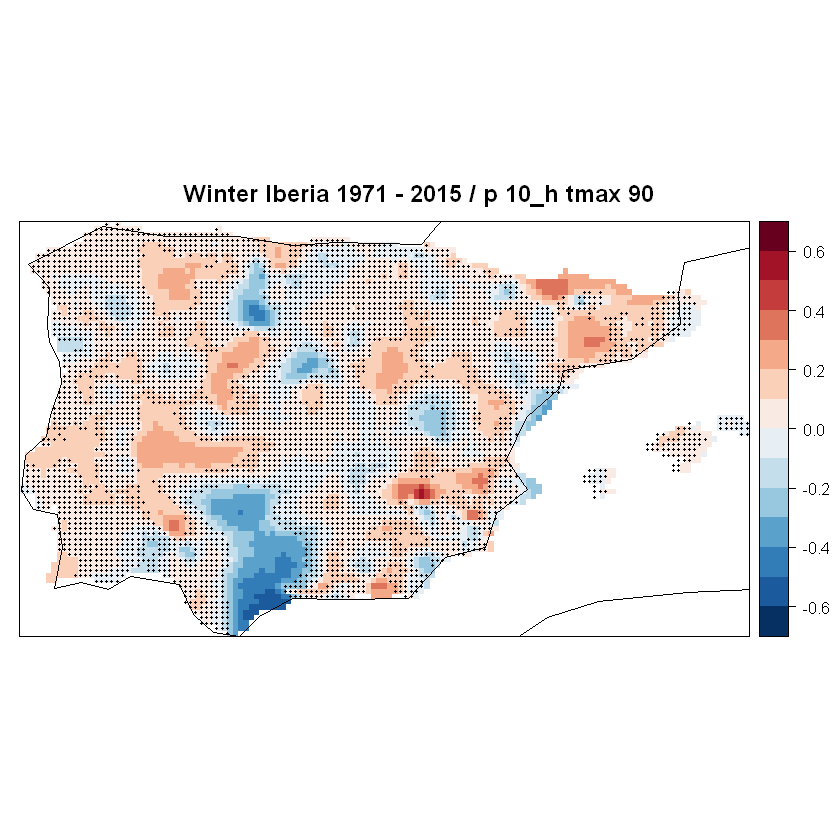

In [8]:
trend.winter <- valueIndex(winter, index.code = "Trend", return.NApercentage = FALSE)# La pendiente
sig.winter <- valueIndex(winter, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
clim.w = climatology(sig.winter)
points.winter <- visualizeR::map.stippling(clim.w, thereshold = 0.05, condition = "LT", pch = 19, cex = 0.25, col = "black")
# Representación
spatialPlot(trend.winter, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Winter Iberia 1971 - 2015 / p 10_h tmax 90", sp.layout = list(points.winter))

#### Spring

[2024-04-02 11:01:36] Computing member 1 out of 1
[2024-04-02 11:03:14] Done.
[2024-04-02 11:03:14] Computing member 1 out of 1
[2024-04-02 11:05:03] Done.
[2024-04-02 11:05:03] - Computing climatology...
[2024-04-02 11:05:03] - Done.


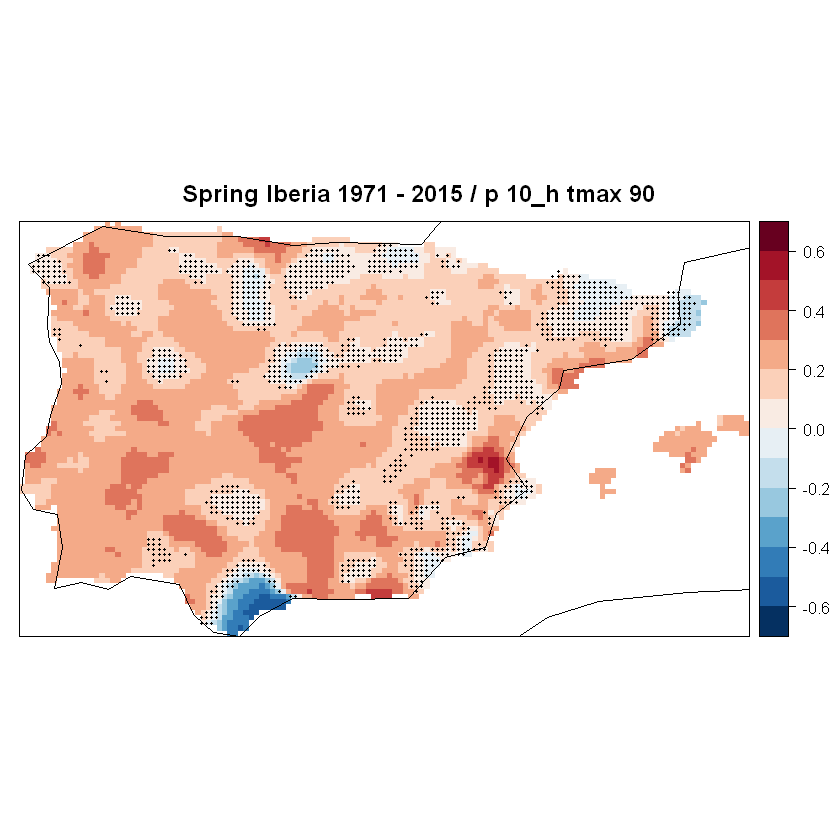

In [14]:
trend.spring <- valueIndex(spring, index.code = "Trend", return.NApercentage = FALSE)# La pendiente
sig.spring <- valueIndex(spring, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
clim.spring = climatology(sig.spring)
points.spring <- visualizeR::map.stippling(clim.spring, thereshold = 0.05, condition = "LT", pch = 19, cex = 0.25, col = "black")
# Representación
spatialPlot(trend.spring, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Spring Iberia 1971 - 2015 / p 10_h tmax 90", sp.layout = list(points.spring))

#### Summer

[2024-04-02 11:09:13] Computing member 1 out of 1
[2024-04-02 11:10:52] Done.
[2024-04-02 11:10:52] Computing member 1 out of 1
[2024-04-02 11:12:23] Done.
[2024-04-02 11:12:23] - Computing climatology...
[2024-04-02 11:12:24] - Done.


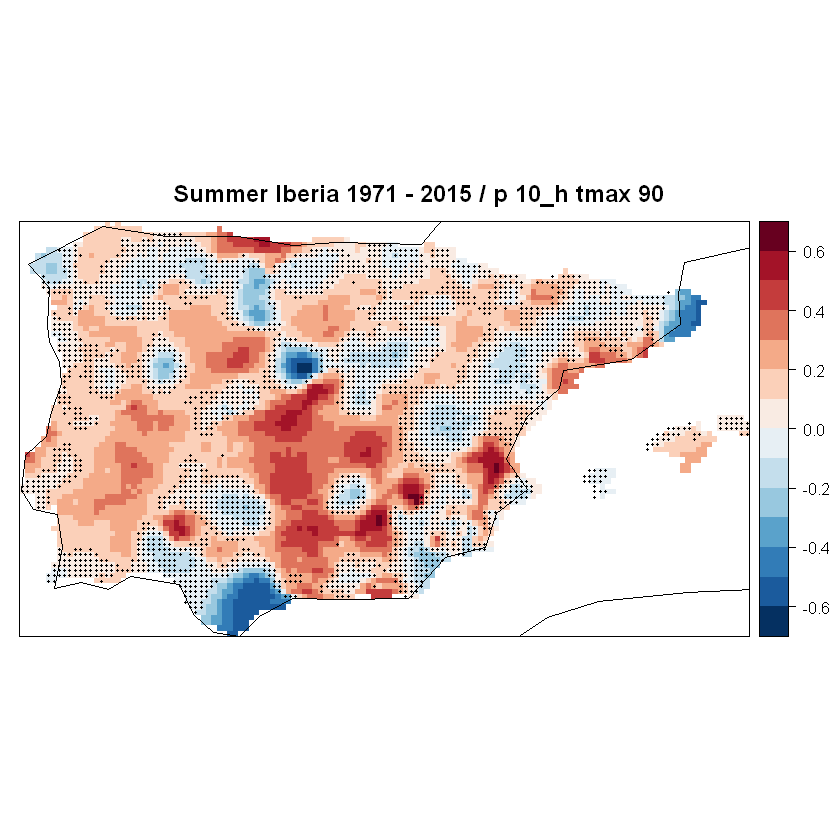

In [15]:
trend.summer <- valueIndex(summer, index.code = "Trend", return.NApercentage = FALSE)# La pendiente
sig.summer <- valueIndex(summer, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
clim.summer = climatology(sig.summer)
points.summer <- visualizeR::map.stippling(clim.summer, thereshold = 0.05, condition = "LT", pch = 19, cex = 0.25, col = "black")
# Representación
spatialPlot(trend.summer, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Summer Iberia 1971 - 2015 / p 10_h tmax 90", sp.layout = list(points.summer))

#### Autumn

[2024-04-02 11:16:15] Computing member 1 out of 1


[2024-04-02 11:17:50] Done.
[2024-04-02 11:17:50] Computing member 1 out of 1
[2024-04-02 11:19:29] Done.
[2024-04-02 11:19:29] - Computing climatology...
[2024-04-02 11:19:29] - Done.


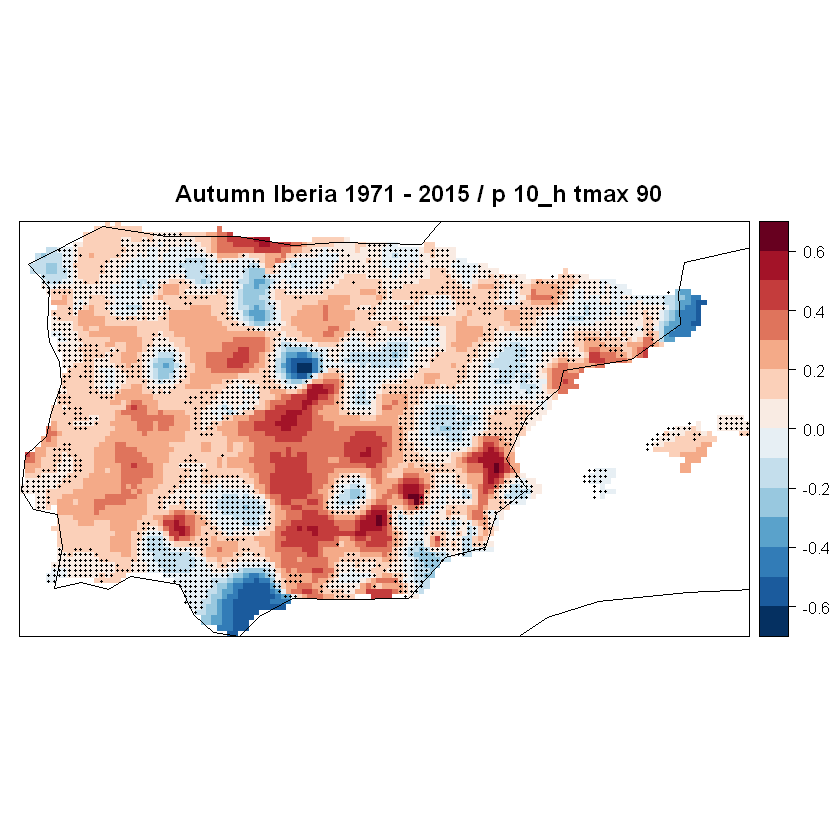

In [17]:
trend.summer <- valueIndex(summer, index.code = "Trend", return.NApercentage = FALSE)# La pendiente
sig.summer <- valueIndex(summer, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
clim.summer = climatology(sig.summer)
points.summer <- visualizeR::map.stippling(clim.summer, thereshold = 0.05, condition = "LT", pch = 19, cex = 0.25, col = "black")
# Representación
spatialPlot(trend.summer, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Autumn Iberia 1971 - 2015 / p 10_h tmax 90", sp.layout = list(points.summer))

## Pruebas

In [7]:
trend.winter <- valueIndex(winter, index.code = "Trend", return.NApercentage = FALSE) # La pendiente
sig.winter <- valueIndex(winter, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
sig.winter$Data[sig.winter$Data == 0] <- NA
trend.sig.winter <- gridArithmetics(trend.winter, sig.winter, operator = "*")


pval.winter <- climatology(winter, clim.fun = list(FUN = "trend.1D", dates = getRefDates(winter), method = "kendall", return.pvalue = TRUE))
points.winter <- visualizeR::map.stippling(pval.winter, thereshold = 0.05, condition = "GE", pch = 19, cex = 0.25, col = "black")

# Representaciones
spatialPlot(trend.winter, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by =0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Winter Iberia 1971 - 2015 / p 0.1 - tmax 30")
spatialPlot(trend.sig.winter, backdrop.theme = "coastline", color.theme = "RdBu", rev.colors = TRUE, main = paste("Winter Iberia 1971 - 2015 / p 0.1 - tmax 30", "Significance"), at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7)
spatialPlot(trend.winter, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Winter Iberia 1971 - 2015 / p 0.1 - tmax 30", sp.layout = list(points.winter))


[2024-04-02 10:17:14] Computing member 1 out of 1
[2024-04-02 10:19:02] Done.
[2024-04-02 10:19:03] Computing member 1 out of 1


: 

[2024-03-26 14:01:10] Computing member 1 out of 1


[2024-03-26 14:02:01] Done.
[2024-03-26 14:02:01] Computing member 1 out of 1
[2024-03-26 14:02:54] Done.
[2024-03-26 14:02:54] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = t

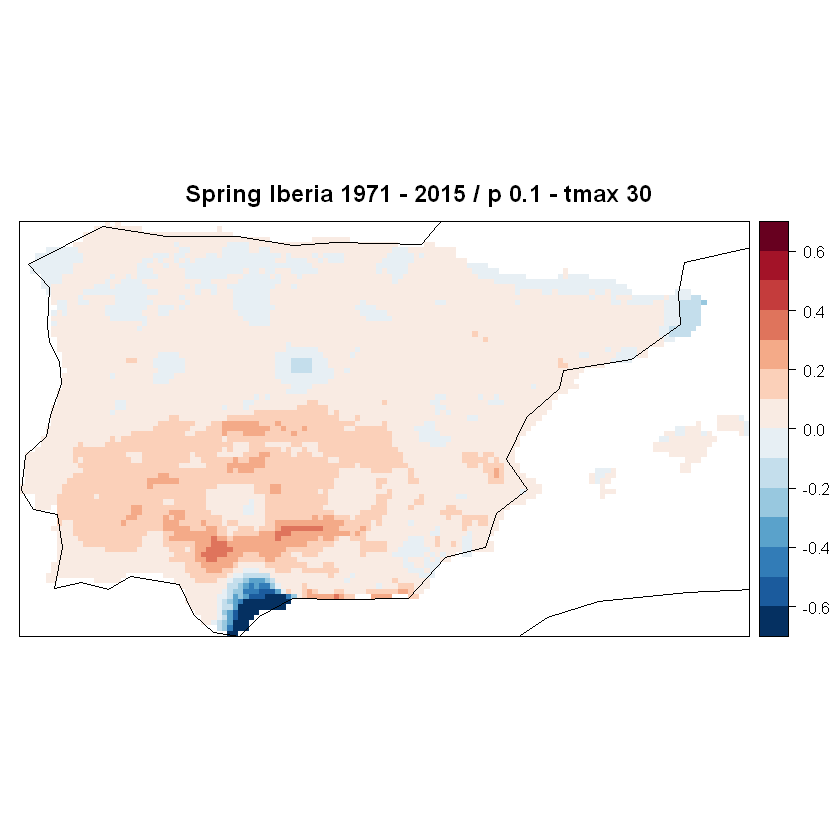

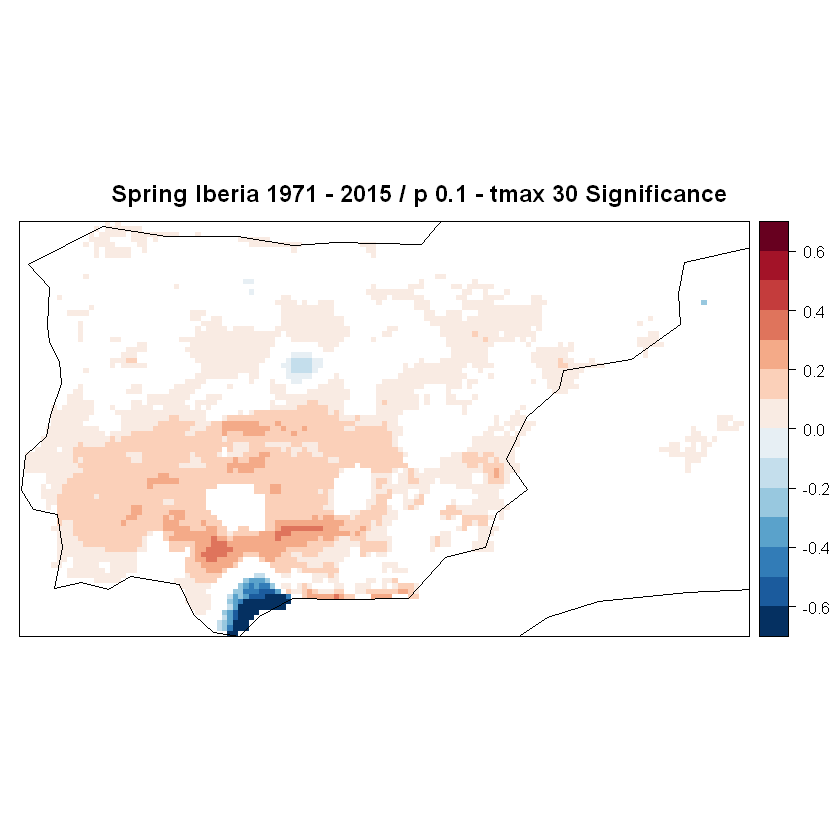

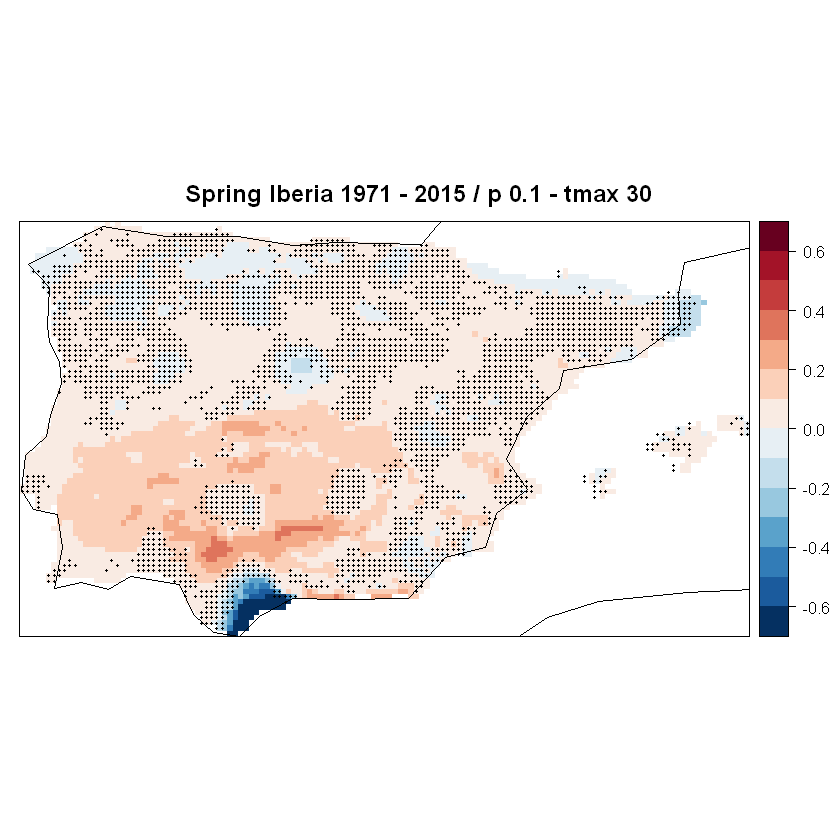

In [15]:
trend.spring <- valueIndex(spring, index.code = "Trend", return.NApercentage = FALSE) # La pendiente
sig.spring <- valueIndex(spring, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
sig.spring$Data[sig.spring$Data == 0] <- NA
trend.sig.spring <- gridArithmetics(trend.spring, sig.spring, operator = "*")


pval.spring <- climatology(spring, clim.fun = list(FUN = "trend.1D", dates = getRefDates(spring), method = "kendall", return.pvalue = TRUE))
points.spring <- visualizeR::map.stippling(pval.spring, thereshold = 0.05, condition = "GE", pch = 19, cex = 0.25, col = "black")

# Representaciones
spatialPlot(trend.spring, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by =0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Spring Iberia 1971 - 2015 / p 0.1 - tmax 30")
spatialPlot(trend.sig.spring, backdrop.theme = "coastline", color.theme = "RdBu", rev.colors = TRUE, main = paste("Spring Iberia 1971 - 2015 / p 0.1 - tmax 30", "Significance"), at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7)
spatialPlot(trend.spring, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Spring Iberia 1971 - 2015 / p 0.1 - tmax 30", sp.layout = list(points.spring))

[2024-03-26 14:04:50] Computing member 1 out of 1
[2024-03-26 14:05:44] Done.
[2024-03-26 14:05:44] Computing member 1 out of 1
[2024-03-26 14:06:45] Done.
[2024-03-26 14:06:45] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value w

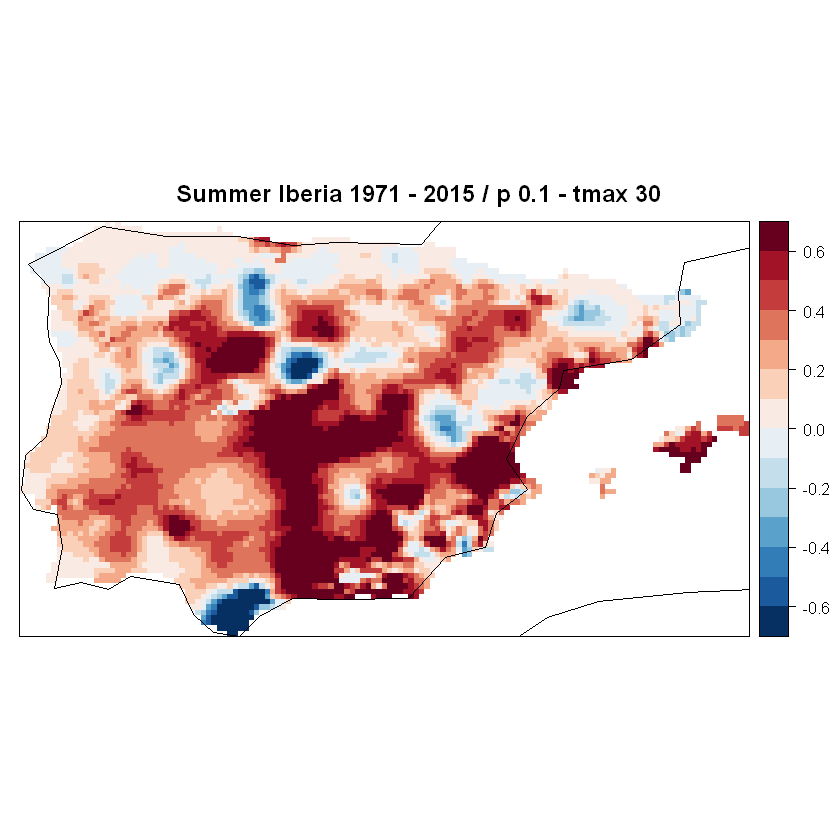

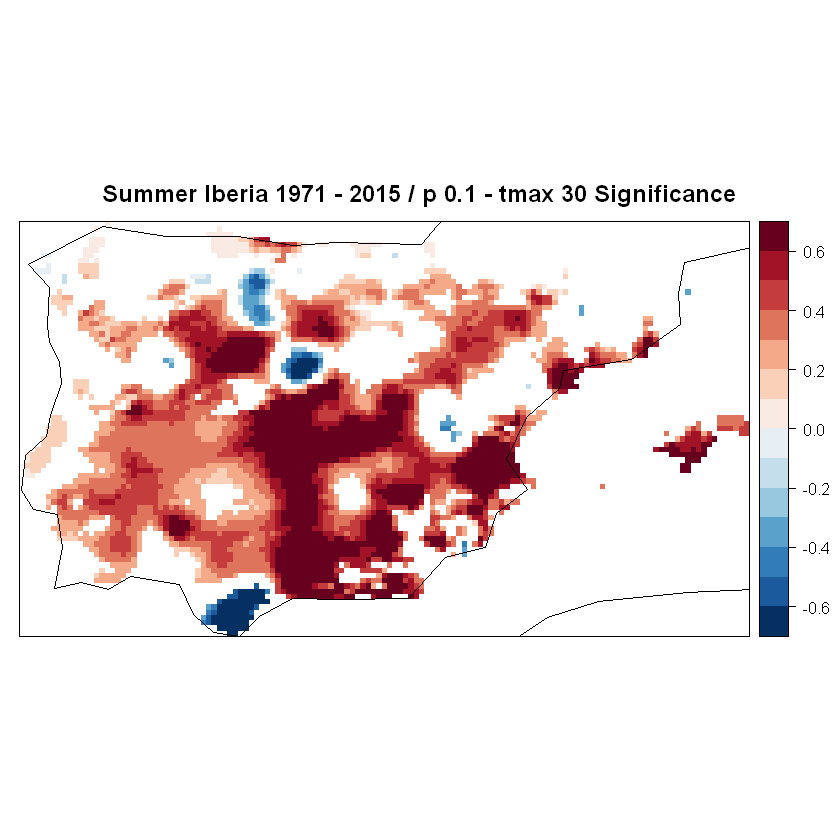

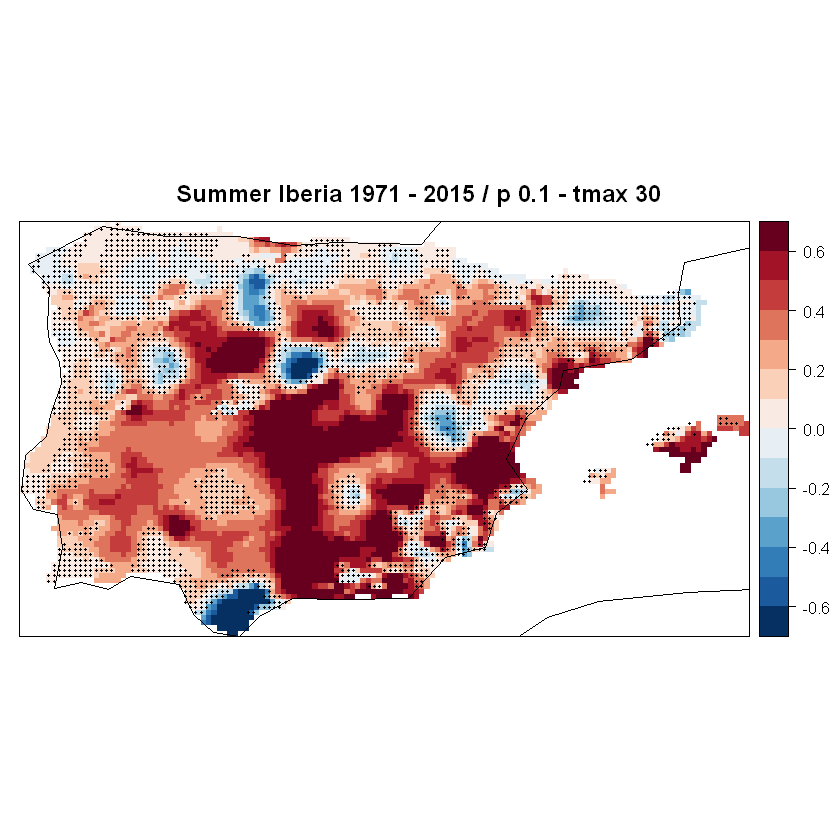

In [16]:
trend.summer <- valueIndex(summer, index.code = "Trend", return.NApercentage = FALSE) # La pendiente
sig.summer <- valueIndex(summer, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
sig.summer$Data[sig.summer$Data == 0] <- NA
trend.sig.summer <- gridArithmetics(trend.summer, sig.summer, operator = "*")


pval.summer <- climatology(summer, clim.fun = list(FUN = "trend.1D", dates = getRefDates(summer), method = "kendall", return.pvalue = TRUE))
points.summer <- visualizeR::map.stippling(pval.summer, thereshold = 0.05, condition = "GE", pch = 19, cex = 0.25, col = "black")

# Representaciones
spatialPlot(trend.summer, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by =0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Summer Iberia 1971 - 2015 / p 0.1 - tmax 30")
spatialPlot(trend.sig.summer, backdrop.theme = "coastline", color.theme = "RdBu", rev.colors = TRUE, main = paste("Summer Iberia 1971 - 2015 / p 0.1 - tmax 30", "Significance"), at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7)
spatialPlot(trend.summer, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Summer Iberia 1971 - 2015 / p 0.1 - tmax 30", sp.layout = list(points.summer))

[2024-03-26 14:08:15] Computing member 1 out of 1
[2024-03-26 14:09:04] Done.
[2024-03-26 14:09:05] Computing member 1 out of 1
[2024-03-26 14:09:53] Done.
[2024-03-26 14:09:53] - Computing climatology...
Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(x = ts, y = x, method = method, conf.level = conf.level):
"Cannot compute exact p-value w

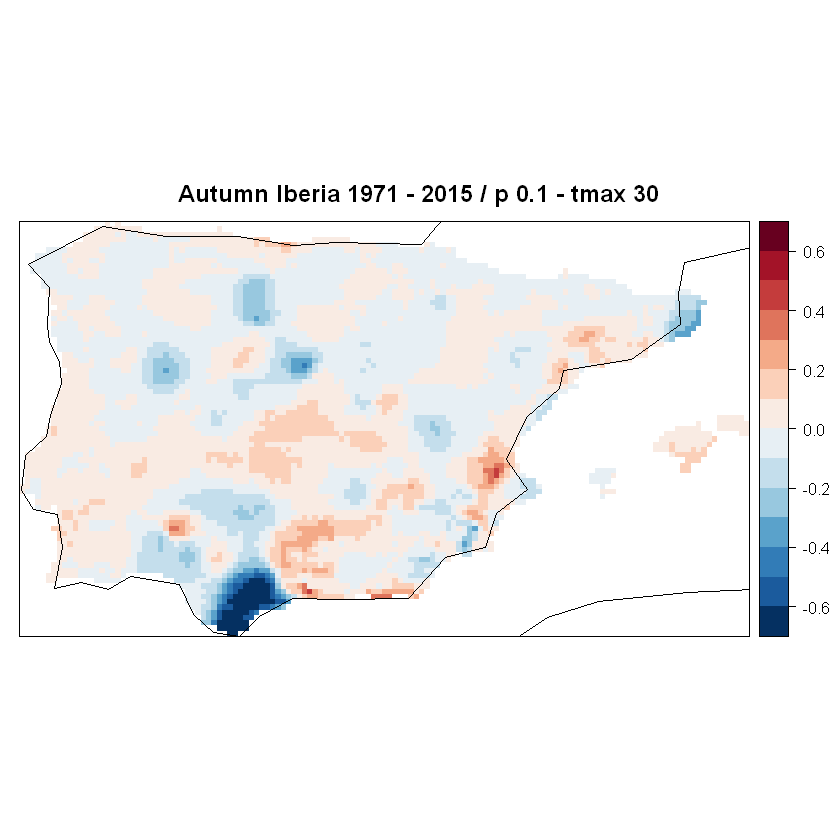

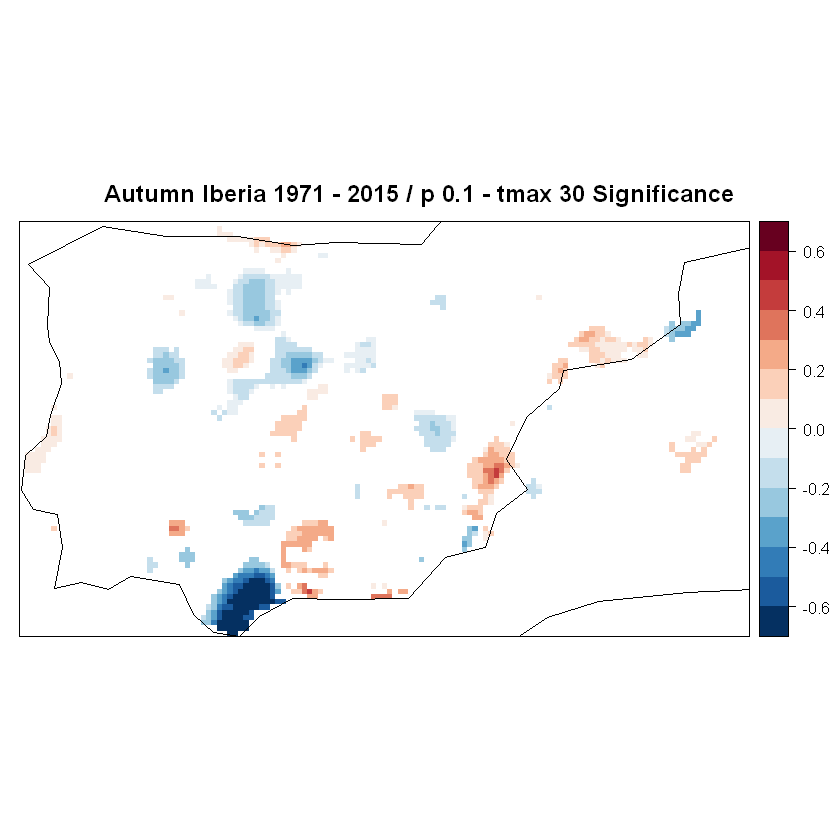

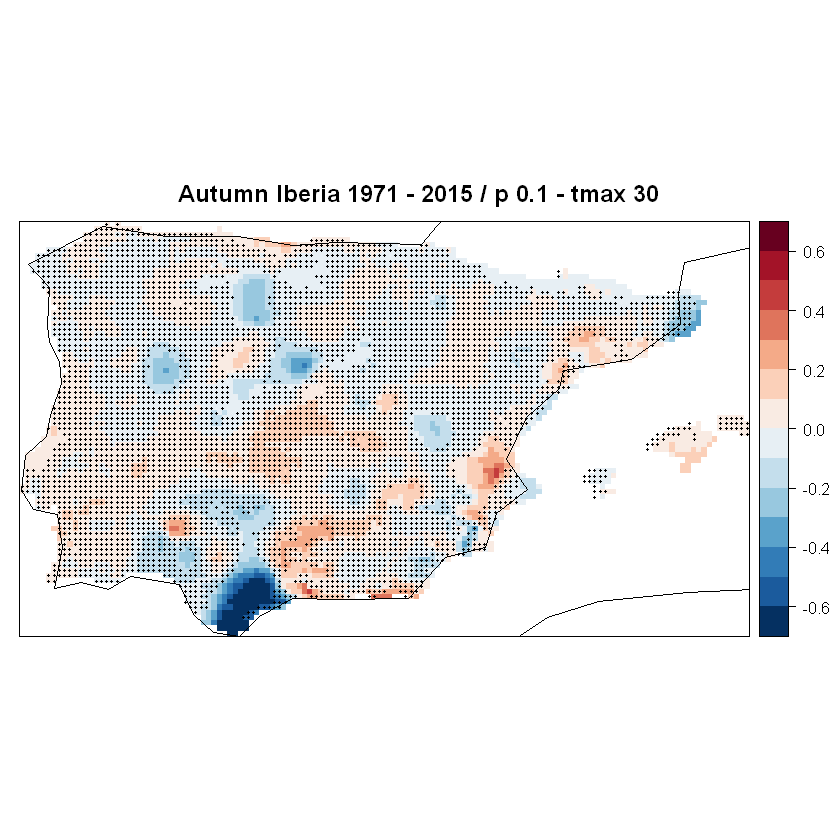

In [17]:
trend.autumn <- valueIndex(autumn, index.code = "Trend", return.NApercentage = FALSE) # La pendiente
sig.autumn <- valueIndex(autumn, index.code = "TrendSig", return.NApercentage = FALSE) # La significancia (1 o 0)
# Si significancia es 0 entonces la pendiente no es significativa = NA
sig.autumn$Data[sig.autumn$Data == 0] <- NA
trend.sig.autumn <- gridArithmetics(trend.autumn, sig.autumn, operator = "*")


pval.autumn <- climatology(autumn, clim.fun = list(FUN = "trend.1D", dates = getRefDates(autumn), method = "kendall", return.pvalue = TRUE))
points.autumn <- visualizeR::map.stippling(pval.autumn, thereshold = 0.05, condition = "GE", pch = 19, cex = 0.25, col = "black")

# Representaciones
spatialPlot(trend.autumn, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by =0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Autumn Iberia 1971 - 2015 / p 0.1 - tmax 30")
spatialPlot(trend.sig.autumn, backdrop.theme = "coastline", color.theme = "RdBu", rev.colors = TRUE, main = paste("Autumn Iberia 1971 - 2015 / p 0.1 - tmax 30", "Significance"), at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7)
spatialPlot(trend.autumn, backdrop.theme = "coastline", color.theme = "RdBu", at = seq(-0.7, 0.7, by = 0.1), set.max = 0.7, set.min = -0.7, rev.colors = TRUE, main = "Autumn Iberia 1971 - 2015 / p 0.1 - tmax 30", sp.layout = list(points.autumn))